# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'train.p'
testing_file  = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test,  y_test  =  test['features'],  test['labels']
print("Data Loaded")

Data Loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples?
n_train = len(X_train)

# Number of testing examples?
n_test =  len(X_test)

# What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels are there in the dataset?
n_classes = 42

print("Number of training examples =", n_train)
print("Number of testing examples =",  n_test)
print("Image data shape =",  image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 42


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

2


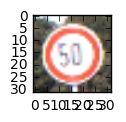

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

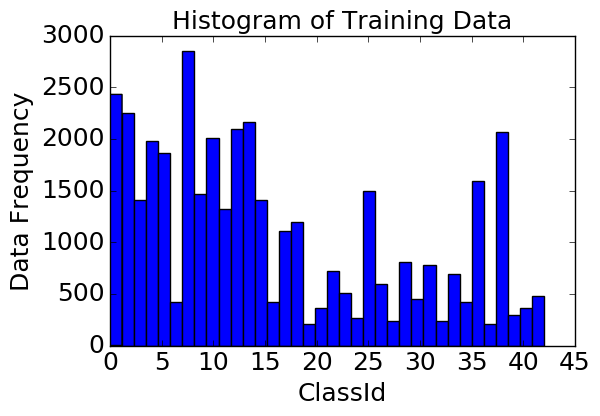

In [56]:
plt.hist(y_train,bins='auto')
plt.xlabel('ClassId',fontsize=18)
plt.ylabel('Data Frequency',fontsize=18)
plt.title('Histogram of Training Data',fontsize=18)
plt.tick_params(axis='both',which='major',labelsize=18)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### PREPROCESSING STEP: Convert images to YUV and then normalize contrast
import cv2
def preprocess(img_rgb):
    img_yuv              = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
    img_yuv_normg        = img_yuv
    img_yuv_normg[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return img_yuv_normg 

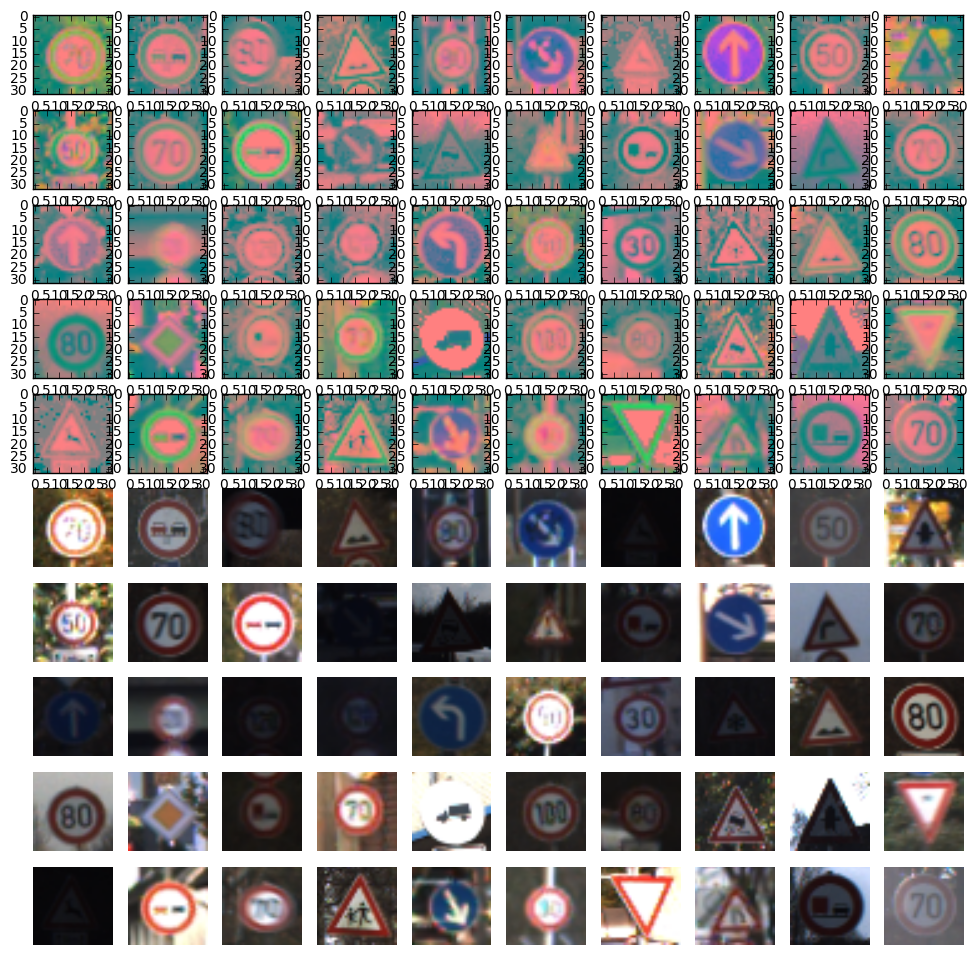

In [7]:
### PREPROCESSING STEP: Compare preprocessed images (top half of grid below) to raw images (bottom half of grid below)
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02)
plt.figure(figsize=(12,12))
j=51
for i in range(50):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    index = random.randint(0, len(X_train))
    image  = X_train[index].squeeze()
    img = preprocess(image)
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.subplot(10,10,j)
    j=j+1
    plt.imshow(image)
    plt.axis('off')
plt.show()

In [8]:
### PREPROCESSING STEP: Preprocess the entire training dataset and test datasets 
# Training Data
r = len(X_train)
X_train_proc = X_train
print('X_train is size',r)
for idx in range(r):
    rawimage   = X_train[idx].squeeze()
    procimg    = preprocess(rawimage)  
    X_train_proc[idx] = procimg    
y_train_proc = y_train    
print('Preprocessing of X_train complete')
print('X_train_proc is size',len(X_train_proc))
print('Y_train_proc is size',len(y_train_proc))

X_train is size 39209
Preprocessing of X_train complete
X_train_proc is size 39209
Y_train_proc is size 39209


In [9]:
### PREPROCESSING STEP: Preprocess the entire test dataset (YUV conversion and contrast normalization)
r = len(X_test)
X_test_proc = X_test
print('X_test is size',r)
for idx in range(r):
    rawimage   = X_test[idx].squeeze()
    procimg    = preprocess(rawimage)  
    X_test_proc[idx] = procimg    
y_test_proc = y_test    
print('Preprocessing of X_test complete')
print('X_test_proc is size',len(X_test_proc))
print('Y_test_proc is size',len(y_test_proc))

X_test is size 12630
Preprocessing of X_test complete
X_test_proc is size 12630
Y_test_proc is size 12630


35


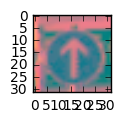

In [10]:
### PREPROCESSING STEP: Recheck the preprocessing to make sure it worked on a random sample
index = random.randint(0, len(X_train))
image = X_train_proc[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train_proc[index])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I read in the the Sermanet and LeCun paper about the preprocessing they had done and implemented something similar in my project. They had converted RGB images to YUV format and then done contrast normalization on the data. I used OpenCV's cvtColor function to convert each image from RGB to YUV and then I used OpenCV's equalizeHist function to normalize the contrast of the Y color channel only.  

From what I read online (see reference below) YUV format seperates into a luminance(or grayscale) Y channel and 2 color channels. The Y channel is like grayscale and I found it more effective to apply contrast normalization to it than RGB. The resulting images seemed like the edges were more well defined. My thought here was that if 1 channel was a grayscale image like in Project 1, it might make it easier for the neural network to find the edges and separate that from color detection.

The contrast normalization helped to accentuate some of the edges and hopefully make those features easier for the neural network to detect.

References:
https://www.reddit.com/r/MachineLearning/comments/3chylb/is_there_an_advantage_to_encode_images_in_yuv/

In [11]:
### ADD ADDITIONAL DATA: Functions to create additional images via image transforms
# code from Vivek Yadav: https://github.com/vxy10/ImageAugmentation
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot      = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M        = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x    = trans_range*np.random.uniform()-trans_range/2
    tr_y    = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    #img = augment_brightness_camera_images(img)
    
    return img

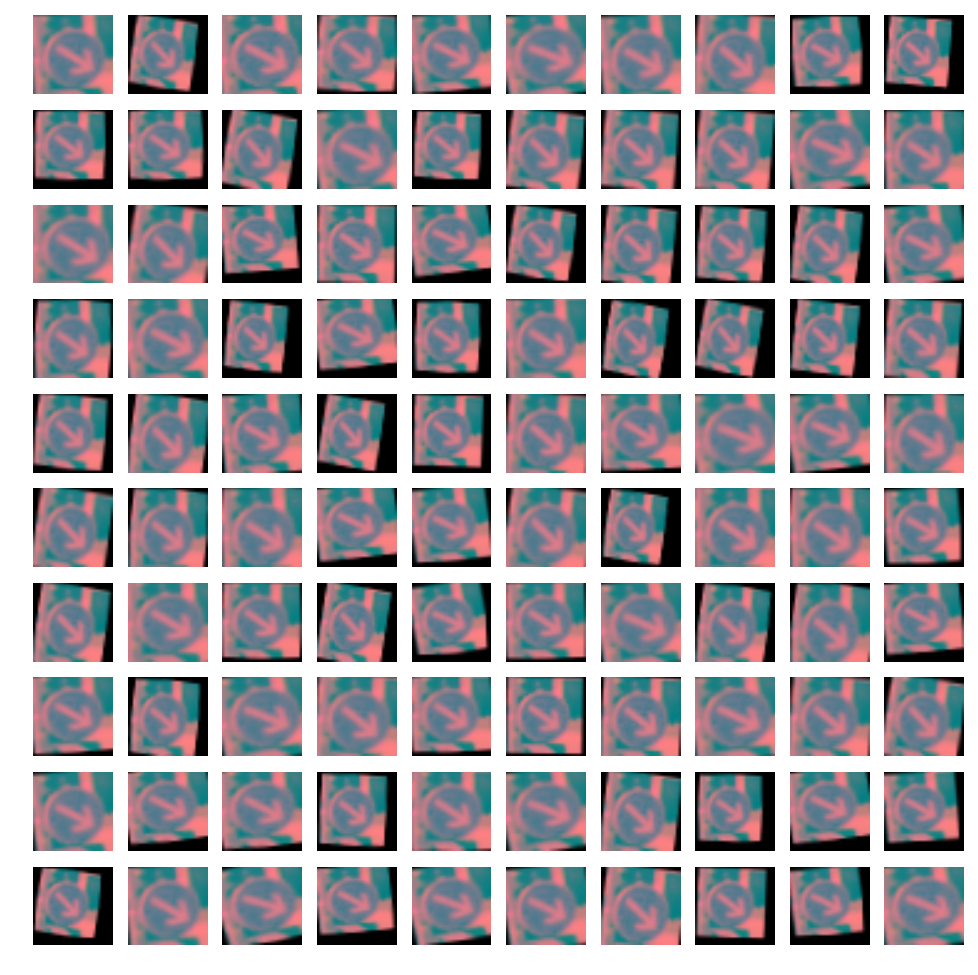

In [12]:
### ADDITIONAL DATA: Sample and Plot Transformed Images

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
index = random.randint(0, len(X_train))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    image = X_train_proc[index].squeeze()
    img = transform_image(image,15,5,0)
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [13]:
### ADDITIONAL DATA: Add transformed images
# Training Data
r = len(X_train_proc)
num2add = 4
X_train_final = np.empty([r*num2add,32,32,3])
y_train_final = np.empty([r*num2add,1])
print('X_train_proc is size',r)
print('Generation of additional data started...')
j=0
for idx in range(r):
    rawimage   = X_train_proc[idx].squeeze()
    for jdx in range(num2add):
        procimg    = transform_image(rawimage,15,5,0) 
        #procimg    = rawimage
        X_train_final[j] = procimg
        y_train_final[j] = y_train[idx]
        j=j+1
print('Generation of additional data complete')
print('X_train_final is size',len(X_train_final))
print('y_train_final is size',len(y_train_final))

X_train_proc is size 39209
Generation of additional data started...
Generation of additional data complete
X_train_final is size 156836
y_train_final is size 156836


In [14]:
# Split 80% of the data into training data
# Split 20% of the data into validation data
# Training data is then randomly shuffled
from sklearn.model_selection import train_test_split

X_train_final, X_validation_data, y_train_final, y_validation_data = train_test_split(X_train_final, y_train_final, test_size=0.2, random_state=0)

print("Updated Image Shape: ",format(X_train_final[0].shape))

from sklearn.utils import shuffle

X_train_final, y_train_final = shuffle(X_train_final,y_train_final)

print('Separation of Training and Validation Data Complete')
print('X_train_final is size',len(X_train_final))
print('y_train_final is size',len(y_train_final))
print('X_validation_data is size',len(X_validation_data))
print('y_validation_data is size',len(y_validation_data))

Updated Image Shape:  (32, 32, 3)
Separation of Training and Test Data Complete
X_train_final is size 125468
y_train_final is size 125468
X_validation_data is size 31368
y_validation_data is size 31368


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

To setup the data I did something similar to the LENET example from lecture. After preprocessing I split the training data into training and validation. 80% of which is training and 20% is validation.The data is then randomly shuffled before it is sent to the neural network. I did add a significant amount of additional training data before splitting the training and validation data and shuffling, which is described in the following paragraph.

The histogram I plot during the initial data exploration I saw that there were some ClassIds that did not have many images. We would like as much data as possible to properly train the network. To generate additional data I read in the Sermanet and LeCun paper about how they had randomy perturbed samples in position, scale and rotation. That is, they artifically transformed each image and created additional 'jittered' datasets. I used a tool I found via a question on the CarND forums written by Vivek Yadav to do image augmentation. I set this tool up to rotate images by random values between +/- 15 degrees and random values of shear up to 5. Due to processing constraints I was only able to add a few jittered images per raw image, but I was able to increase the training size by a factor of 4 from 39209 to 156836. This should hopefully improve the network robustness since it now has access to more data of the traffic signs in more "orientations."

References:
https://github.com/vxy10/ImageAugmentation

In [15]:
### Define your architecture here.
import tensorflow as tf

EPOCHS     = 30
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):   
    # HyperParameters
    mu    = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print(logits.get_shape())
    
    return logits
    

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is identical to the LeNet network from lecture. It consists of 5 layers described below:
    Layer 1: A Convolutional layer with input preproessed images of size 32x32x3 and output of 28x28x6.
    Pooling layer with input of  28x28x6 and output 14x14x6.
    Layer 2: A Convolutional layer with output 10x10x16.
    Pooling layer with input of 10x10x16 and output 5x5x16.
    Flatten layer with input of   5x5x16 and output 400.
    Layer 3: A Fully Connected layer with input size 400 and output size 120.
    Layer 4: A Fully Connected layer with input size 120 and output size 84.
    Layer 5: A Fully Connected layer with input size  84 and output size 43.

In [16]:
### Train your model here.
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
y = tf.placeholder(tf.int32, shape=(None,))
one_hot_y = tf.one_hot(y, 43)

In [17]:
rate = 0.001

logits             = LeNet(x)
cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation     = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver              = tf.train.Saver()

(?, 43)


In [18]:
def evaluate(X_data, y_data):
    num_examples   = len(X_data)
    total_accuracy = 0
    total_loss     = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_x = np.squeeze(batch_x)
        batch_y = np.squeeze(batch_y)
        accuracy,loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss     += (loss * len(batch_x))
    yield (total_accuracy / num_examples) 
    yield (total_loss / num_examples)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_final)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_final, y_train_final = shuffle(X_train_final, y_train_final)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = np.squeeze(X_train_final[offset:end]), np.squeeze(y_train_final[offset:end])
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})       
        validation_accuracy,validation_loss = evaluate(X_validation_data, y_validation_data)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss     = {:.3f}".format(validation_loss))
        print()
        #if (validation_accuracy > 0.96) and (validation_loss<0.1):
        #    break
        
    saver.save(sess, 'lenet1.ckpt')
    print("Model saved")
    #test_acc,test_loss = evaluate(X_test_proc,y_test_proc)
    #print("Test Accuracy = {:.3f}".format(test_acc))

Training...

EPOCH 1 ...
Validation Accuracy = 0.696
Validation Loss     = 0.963

EPOCH 2 ...
Validation Accuracy = 0.787
Validation Loss     = 0.659

EPOCH 3 ...
Validation Accuracy = 0.808
Validation Loss     = 0.597

EPOCH 4 ...
Validation Accuracy = 0.832
Validation Loss     = 0.532

EPOCH 5 ...
Validation Accuracy = 0.855
Validation Loss     = 0.454

EPOCH 6 ...
Validation Accuracy = 0.861
Validation Loss     = 0.437

EPOCH 7 ...
Validation Accuracy = 0.877
Validation Loss     = 0.400

EPOCH 8 ...
Validation Accuracy = 0.893
Validation Loss     = 0.348

EPOCH 9 ...
Validation Accuracy = 0.882
Validation Loss     = 0.386

EPOCH 10 ...
Validation Accuracy = 0.894
Validation Loss     = 0.349

EPOCH 11 ...
Validation Accuracy = 0.898
Validation Loss     = 0.341

EPOCH 12 ...
Validation Accuracy = 0.900
Validation Loss     = 0.338

EPOCH 13 ...
Validation Accuracy = 0.907
Validation Loss     = 0.328

EPOCH 14 ...
Validation Accuracy = 0.882
Validation Loss     = 0.413

EPOCH 15 ...
Val

In [20]:
accuracy = tf.reduce_mean 
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    tf.train.import_meta_graph('lenet.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    test_acc,test_loss = evaluate(X_test_proc,y_test_proc)
    print("Test Accuracy = {:.3f}".format(test_acc))

Test Accuracy = 0.852


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I trained my model with the following hyper parameters:

Optimizer:     Adam Optimizer
Activation:    Standard ReLu
batch size:    128
epochs:        30
learning rate: 0.001

Normal Distribution used to sample initial weights:
Mean:   0
StdDev: 0

I followed the same process as the LeNet lab for training the data and computing validation accuracy. 

I chose a certain number of epochs, for each epoch the training data is shuffled, then a batch of 128 images at a time are sent to the network until all the images have been run through the network. The model is first run through the LeNet architecture to produce the logits for that batch, the softmax is then computed and then the cross entropy. Finally the optimizer and minimization is run on the data.

Once 1 epoch is completed, the validation accuracy and loss is displayed and the process repeats for a new epoch. The validation accuracy is computed by comparing the one-hot encoded logits and labels.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
### The process I chose to produce a solution to the problem was to start with what was given in lecture and then apply some additional preprocessing and adjust some of the hyperparameters to produce a solution. These are the steps in more detail:
1) I chose to stick with the LeNet layout beacuse it was familiar from lecture and it seemed to produce good results.
2) I read in the Sermanet and LeCunn paper that they had done some preprocessing, based on their result of 98.97% I felt this was a good indication that I should try and replicate their preprocessing. I converted the data to YUV, applied contrast normalization to the Y channel. Inspecting the images by hand showed that this could improve the quality of the images and make things like edges easier to discern.
3) I also read in the Sermanet and LeCunn paper that they generated additional data by transforming the data. This seemed like a good idea since I noticed that the data was not evenly distributed. I therefore generated 4 times the amount of original data.
4) I chose to run batches of 128 images each over 30 epochs. These numbers are after a great deal of trial and error and weighing the best combination of validation accuracy, validation loss and test accuracy. I found that longer training epochs (I tried up to 200) increased my validation accuracy, but often the test accuracy would suffer. I believe after a certain point I was overfitting. 30 epochs seemed to be the best choice. I tried batches of 256 and 512, but it seemed to have little effect other than speeding up or slowing down the computers training speed. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
# I collected 2 sets of data
# The first set is 5 screen captures from Google Earth Street view in Stuttgart Germany
# The second set are 15 cellphone camera images collected at night from my car in Minnesota

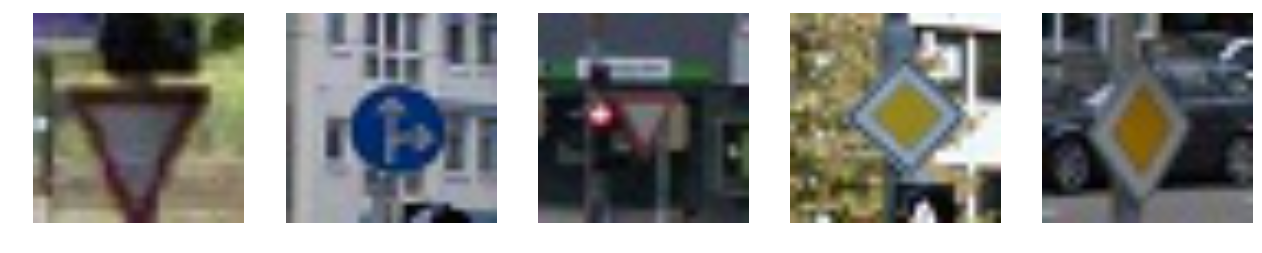

In [21]:
### LOAD DATA SET 1: GERMAN SAMPLE SET
# This set has 5 traffic signs manually cropped from screen captures from Google Earth Street view in Stuttgart, Germany.
#
German2  = cv2.imread("TrafficSigns/German/jpg/TrafficSign2.jpg",3)
German2  = cv2.cvtColor(German2,cv2.COLOR_BGR2RGB)
German5  = cv2.imread("TrafficSigns/German/jpg/TrafficSign5.jpg",3)
German5  = cv2.cvtColor(German5,cv2.COLOR_BGR2RGB)
German6  = cv2.imread("TrafficSigns/German/jpg/TrafficSign6.jpg",3)
German6  = cv2.cvtColor(German6,cv2.COLOR_BGR2RGB)
German7  = cv2.imread("TrafficSigns/German/jpg/TrafficSign7.jpg",3)
German7  = cv2.cvtColor(German7,cv2.COLOR_BGR2RGB)
German8  = cv2.imread("TrafficSigns/German/jpg/TrafficSign8.jpg",3)
German8  = cv2.cvtColor(German8,cv2.COLOR_BGR2RGB)
#
# Preprocess and collect images into structure
#
X_sampletests    = np.empty([5,32,32,3])
Y_sampletests    = np.empty([5])
X_sampletests[0] = preprocess(German2)
Y_sampletests[0] = 13
X_sampletests[1] = preprocess(German5)
Y_sampletests[1] = 36
X_sampletests[2] = preprocess(German6)
Y_sampletests[2] = 13
X_sampletests[3] = preprocess(German7)
Y_sampletests[3] = 12
X_sampletests[4] = preprocess(German8)
Y_sampletests[4] = 12
#
# Plot Raw Images
#
gs2 = gridspec.GridSpec(1, 5)
gs2.update(wspace=0.01, hspace=0.02)
plt.figure(figsize=(32,32))
ax2 = plt.subplot(gs2[0])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_aspect('equal')
plt.subplot(1,10,1)
plt.imshow(German2)  # Sign Type 13 (Yield)
plt.axis('off')
plt.subplot(1,10,2)
plt.imshow(German5)  # Sign Type 36 (Straight or Right) 
plt.axis('off')
plt.subplot(1,10,3)
plt.imshow(German6)  # Sign Type 13 (Yield)
plt.axis('off')
plt.subplot(1,10,4)
plt.imshow(German7)  # Sign Type 12 (Priority Road)
plt.axis('off')
plt.subplot(1,10,5)
plt.imshow(German8)  # Sign Type 12 (Priority Road)
plt.axis('off')
#
plt.show()

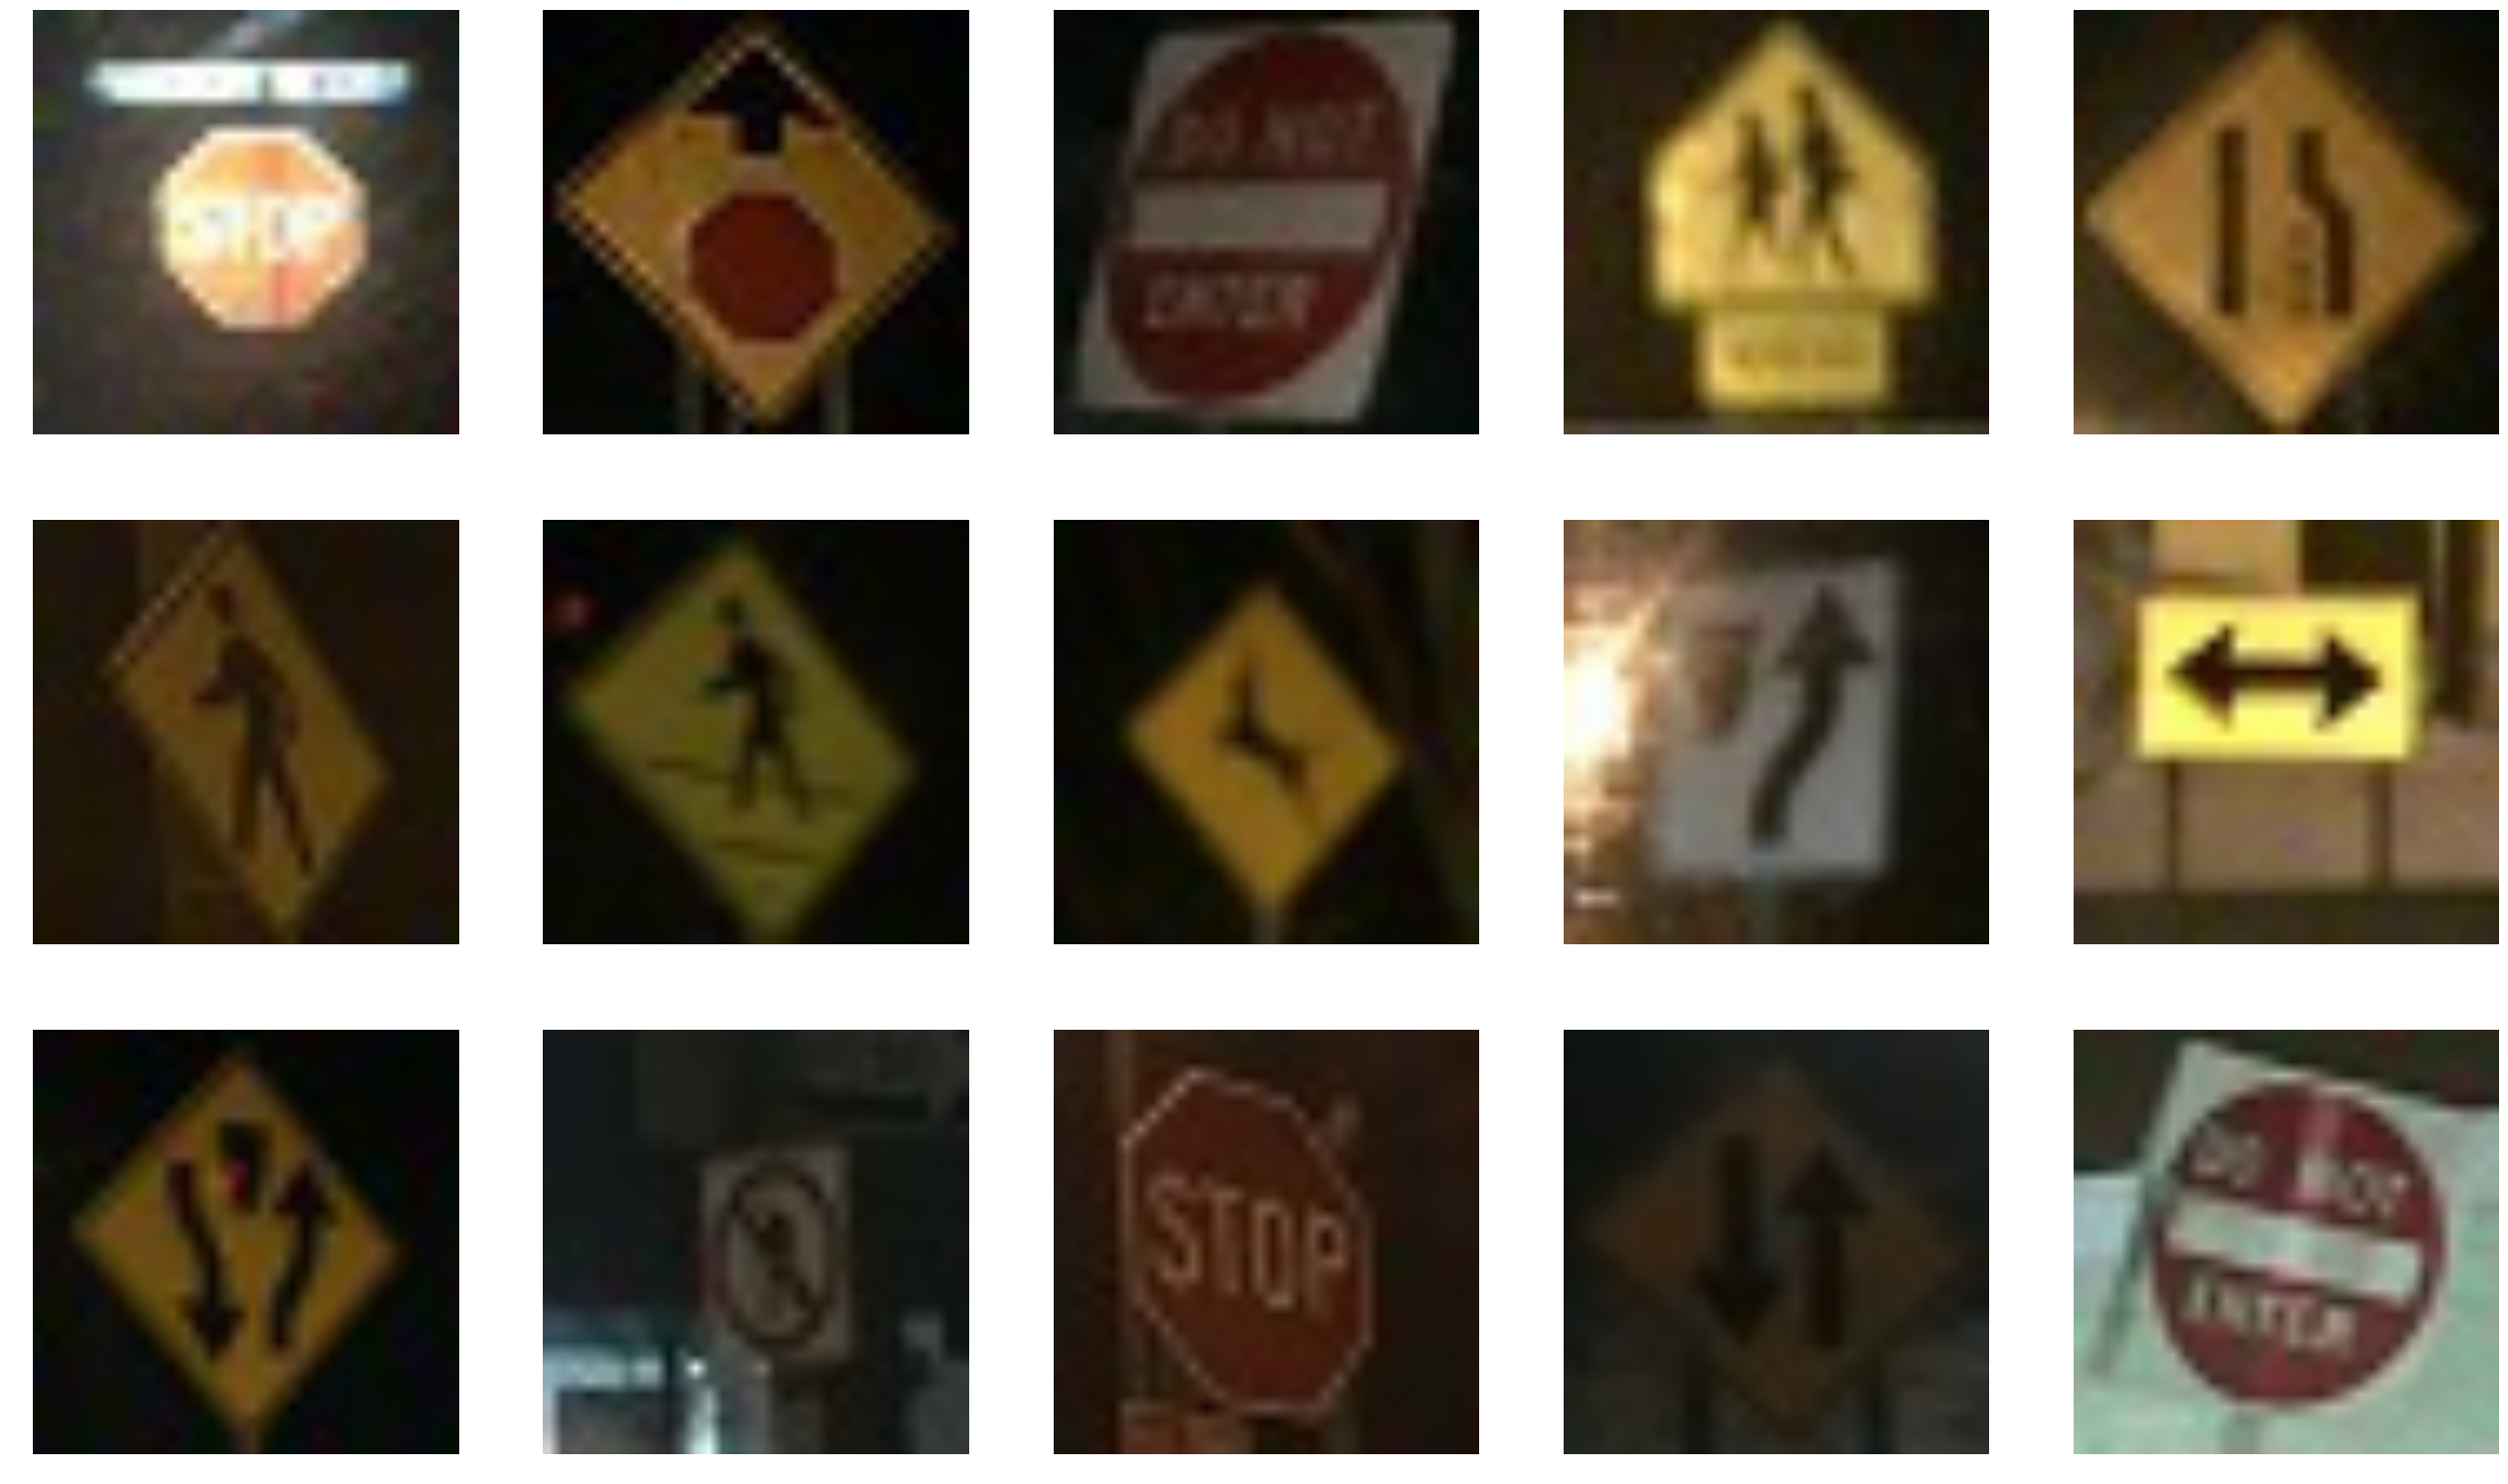

In [22]:
### LOAD DATA SET 2: This set has 15 traffic signs manually cropped from cellphone camera images 
# collected at night from my car in Minnesota.
#
MN1   = cv2.imread("TrafficSigns/Mine/Resized/IMG_3804.jpg",3)
MN1   = cv2.cvtColor(MN1,cv2.COLOR_BGR2RGB)
MN2   = cv2.imread("TrafficSigns/Mine/Resized/IMG_3822.jpg",3)
MN2   = cv2.cvtColor(MN2,cv2.COLOR_BGR2RGB)
MN3   = cv2.imread("TrafficSigns/Mine/Resized/IMG_3825.jpg",3)
MN3   = cv2.cvtColor(MN3,cv2.COLOR_BGR2RGB)
MN4   = cv2.imread("TrafficSigns/Mine/Resized/IMG_3842.jpg",3)
MN4   = cv2.cvtColor(MN4,cv2.COLOR_BGR2RGB)
MN5   = cv2.imread("TrafficSigns/Mine/Resized/IMG_3846.jpg",3)
MN5   = cv2.cvtColor(MN5,cv2.COLOR_BGR2RGB)
MN6   = cv2.imread("TrafficSigns/Mine/Resized/IMG_3854.jpg",3)
MN6   = cv2.cvtColor(MN6,cv2.COLOR_BGR2RGB)
MN7   = cv2.imread("TrafficSigns/Mine/Resized/IMG_3857.jpg",3)
MN7   = cv2.cvtColor(MN7,cv2.COLOR_BGR2RGB)
MN8   = cv2.imread("TrafficSigns/Mine/Resized/IMG_3859.jpg",3)
MN8   = cv2.cvtColor(MN8,cv2.COLOR_BGR2RGB)
MN9   = cv2.imread("TrafficSigns/Mine/Resized/IMG_3861.jpg",3)
MN9   = cv2.cvtColor(MN9,cv2.COLOR_BGR2RGB)
MN10  = cv2.imread("TrafficSigns/Mine/Resized/IMG_3866.jpg",3)
MN10  = cv2.cvtColor(MN10,cv2.COLOR_BGR2RGB)
MN11  = cv2.imread("TrafficSigns/Mine/Resized/IMG_3870.jpg",3)
MN11  = cv2.cvtColor(MN11,cv2.COLOR_BGR2RGB)
MN12  = cv2.imread("TrafficSigns/Mine/Resized/IMG_3875.jpg",3)
MN12  = cv2.cvtColor(MN12,cv2.COLOR_BGR2RGB)
MN13  = cv2.imread("TrafficSigns/Mine/Resized/IMG_3877.jpg",3)
MN13  = cv2.cvtColor(MN13,cv2.COLOR_BGR2RGB)
MN14  = cv2.imread("TrafficSigns/Mine/Resized/IMG_3880.jpg",3)
MN14  = cv2.cvtColor(MN14,cv2.COLOR_BGR2RGB)
MN15  = cv2.imread("TrafficSigns/Mine/Resized/IMG_3886.jpg",3)
MN15  = cv2.cvtColor(MN15,cv2.COLOR_BGR2RGB)
#
# Preprocess and collect images into structure
#
X_mn_sample     = np.empty([15,32,32,3])
Y_mn_sample     = np.empty([15])
X_mn_sample[0]  = preprocess(MN1)
Y_mn_sample[0]  = 0
X_mn_sample[1]  = preprocess(MN2)
Y_mn_sample[1]  = 0
X_mn_sample[2]  = preprocess(MN3)
Y_mn_sample[2]  = 0
X_mn_sample[3]  = preprocess(MN4)
Y_mn_sample[3]  = 0
X_mn_sample[4]  = preprocess(MN5)
Y_mn_sample[4]  = 0
X_mn_sample[5]  = preprocess(MN6)
Y_mn_sample[5]  = 0
X_mn_sample[6]  = preprocess(MN7)
Y_mn_sample[6]  = 0
X_mn_sample[7]  = preprocess(MN8)
Y_mn_sample[7]  = 0
X_mn_sample[8]  = preprocess(MN9)
Y_mn_sample[8]  = 0
X_mn_sample[9]  = preprocess(MN10)
Y_mn_sample[9]  = 0
X_mn_sample[10] = preprocess(MN11)
Y_mn_sample[10] = 0
X_mn_sample[11] = preprocess(MN12)
Y_mn_sample[11] = 0
X_mn_sample[12] = preprocess(MN13)
Y_mn_sample[12] = 0
X_mn_sample[13] = preprocess(MN14)
Y_mn_sample[13] = 0
X_mn_sample[14] = preprocess(MN15)
Y_mn_sample[14] = 0
#
# Plot Raw Images
#
gs2 = gridspec.GridSpec(5, 5)
gs2.update(wspace=0.01, hspace=0.02)
plt.figure(figsize=(32,32))
ax2 = plt.subplot(gs2[0])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_aspect('equal')
plt.subplot(5,5,1)
plt.imshow(MN1)  # Stop
plt.axis('off')
plt.subplot(5,5,2)
plt.imshow(MN2)  # Stop Ahead
plt.axis('off')
plt.subplot(5,5,3)
plt.imshow(MN3)  # Do Not Enter
plt.axis('off')
plt.subplot(5,5,4)
plt.imshow(MN4)  # School Xing
plt.axis('off')
plt.subplot(5,5,5)
plt.imshow(MN5)  # Converge Left
plt.axis('off')
plt.subplot(5,5,6)
plt.imshow(MN6)  # Pedestrians
plt.axis('off')
plt.subplot(5,5,7)
plt.imshow(MN7)  # Crosswalk
plt.axis('off')
plt.subplot(5,5,8)
plt.imshow(MN8)  # Caution Deer
plt.axis('off')
plt.subplot(5,5,9)
plt.imshow(MN9)  # Keep Right
plt.axis('off')
plt.subplot(5,5,10)
plt.imshow(MN10) # 2 Direction
plt.axis('off')
plt.subplot(5,5,11)
plt.imshow(MN11) # Divided Highway
plt.axis('off')
plt.subplot(5,5,12)
plt.imshow(MN12) # No Pedestrians
plt.axis('off')
plt.subplot(5,5,13)
plt.imshow(MN13) # Stop
plt.axis('off')
plt.subplot(5,5,14)
plt.imshow(MN14) # 2 Way Traffic
plt.axis('off')
plt.subplot(5,5,15)
plt.imshow(MN15) # Do Not Enter
plt.axis('off')
#
plt.show()

### Question 6

Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

**Answer:**

### I collected two sets of images to test my network on:

### GERMAN SAMPLE SET:
 This set has 5 traffic signs manually cropped from screen captures from Google Earth Street view in Stuttgart, Germany. For each of these signs there should be a corresponding truth label so we should be able to directly measure the accuracy of the predictions given by the neural network. I believe images 2 and 3 could be difficult for the neural network to predict since the signs are relatively small in each image and the contrast of the sign compared to the overall image is low making it difficult to discern the sign from the rest of the image. 
Image1 - Yield             = Classid 13
Image2 - Straight or Right = Classid 36
Image3 - Yield             = Classid 13
Image4 - Priority Road     = Classid 12
Image5 - Priority Road     = Classid 12


### USA SAMPLE SET:
 This set has 15 traffic signs manually cropped from cellphone camera images collected at night from my car in Minnesota.
Most of these signs do not have a truth label associated with it. The neural network has not been trained for these signs, so it will not be able to identify them, but I thought it would be interesting anyway. These images would be difficult for the neural network to handle since I intentionally took pictures at night in low light conditions with poor contrast. Many of the signs are also covered partially in snow or have a light source behind or in front of them causing reflections in the image. These kinds of effects I believe would make it difficult for the network to extract the features it would expect if it had learned these types of signs. However, I think this is a realistic dataset as the effects of weather, dirt on lenses and lighting conditions would most certainly be present in a real autonomous car.

In [24]:
### Run the predictions for the 5 German road signs from Google Street View, what is the accuracy?
prediction = tf.argmax(tf.nn.softmax(logits),1)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tf.train.import_meta_graph('lenet.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    pred = sess.run(prediction,feed_dict={x:X_sampletests})
print('Prediction:',pred[0],'Truth:',Y_sampletests[0])
print('Prediction:',pred[1],'Truth:',Y_sampletests[1])
print('Prediction:',pred[2],'Truth:',Y_sampletests[2])
print('Prediction:',pred[3],'Truth:',Y_sampletests[3])
print('Prediction:',pred[4],'Truth:',Y_sampletests[4])
acc = 4/5
print('Accuracy:',acc)

Prediction: 13 Truth: 13.0
Prediction: 25 Truth: 36.0
Prediction: 13 Truth: 13.0
Prediction: 12 Truth: 12.0
Prediction: 12 Truth: 12.0
Accuracy: 0.8


In [26]:
### Run the predictions here for the 15 USA road signs from my car just to see what it will predict
prediction = tf.argmax(logits,1)
with tf.Session() as sess:
    tf.train.import_meta_graph('lenet.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    pred = sess.run(prediction,feed_dict={x:X_mn_sample, y:Y_mn_sample})
print('Stop Sign, Prediction:',pred[0])
print('Stop Sign Ahead,Prediction:',pred[1])
print('Do Not Enter, Prediction:',pred[2])
print('School Xing, Prediction:',pred[3])
print('Merge Left, Prediction:',pred[4])
print('Pedestrian, Prediction:',pred[5])
print('Crosswalk, Prediction:',pred[6])
print('Deer, Prediction:',pred[7])
print('Keep Right, Prediction:',pred[8])
print('2 Direction, Prediction:',pred[9])
print('Divided Hwy, Prediction:',pred[10])
print('No Pedestrians, Prediction:',pred[11])
print('Stop, Prediction:',pred[12])
print('2 Way, Prediction:',pred[13])
print('Do Not Enter, Prediction:',pred[14])

Stop Sign, Prediction: 8
Stop Sign Ahead,Prediction: 12
Do Not Enter, Prediction: 17
School Xing, Prediction: 17
Merge Left, Prediction: 28
Pedestrian, Prediction: 18
Crosswalk, Prediction: 12
Deer, Prediction: 14
Keep Right, Prediction: 11
2 Direction, Prediction: 14
Divided Hwy, Prediction: 25
No Pedestrians, Prediction: 28
Stop, Prediction: 11
2 Way, Prediction: 35
Do Not Enter, Prediction: 17


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

### Manual checking of the accuracy against signnames.csv shows 80% accuracy

My model was able to classify 4 of the 5 images I took from Google Street view in Germany, meaning it is 80% accurate. This matches approximately the accuracy we saw on the test set after training and validation. I manually checked the predictions versus the truth:

Image 1:Prediction: 13 Truth: 13.0 Correct
Image 2:Prediction: 25 Truth: 36.0 Incorrect
Image 3:Prediction: 13 Truth: 13.0 Correct
Image 4:Prediction: 12 Truth: 12.0 Correct
Image 5:Prediction: 12 Truth: 12.0 Correct
Resulting Accuracy: 0.8

For the USA SAMPLE SET it was interesting that it wasnt able to classify the stop signs as those are very similar to the German version of a stop sign.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Compute the model's softmax probabilities
# Note code comes partially from Vivek Yadav's response to a question on the CARND-Forums: 
# https://carnd-forums.udacity.com/questions/20743066/how-do-i-plot-the-predicted-value-along-with-the-5-images-in-the-newdata-array

softmax = tf.nn.softmax(logits)
top5    = tf.nn.top_k(softmax, k=5, sorted=True, name=None) 

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    tf.train.import_meta_graph('lenet.ckpt.meta')
    saver.restore(session,tf.train.latest_checkpoint('./'))
    top5_pred = session.run(top5, feed_dict = {x: X_sampletests})
    top5_pred_sftmax = top5_pred[0]
    top5_pred_labels = top5_pred[1]
    print(top5_pred_sftmax)
    print(top5_pred_labels)

[[  8.93021643e-01   5.33104911e-02   2.58655846e-02   1.80963092e-02
    4.74555278e-03]
 [  9.20646906e-01   7.82258809e-02   8.79476895e-04   8.50739962e-05
    7.09415981e-05]
 [  9.80341434e-01   1.91369615e-02   5.21585986e-04   1.50785656e-12
    3.71940082e-13]
 [  9.99999881e-01   1.62900065e-07   1.41034384e-08   1.08904630e-11
    1.06372125e-11]
 [  7.75600612e-01   2.24197611e-01   1.81775671e-04   1.87516780e-05
    7.47534784e-07]]
[[13  4 39 12  7]
 [25 33 28 18 20]
 [13  1  4 14  0]
 [12 13 15 14 11]
 [12 40 14  7 15]]


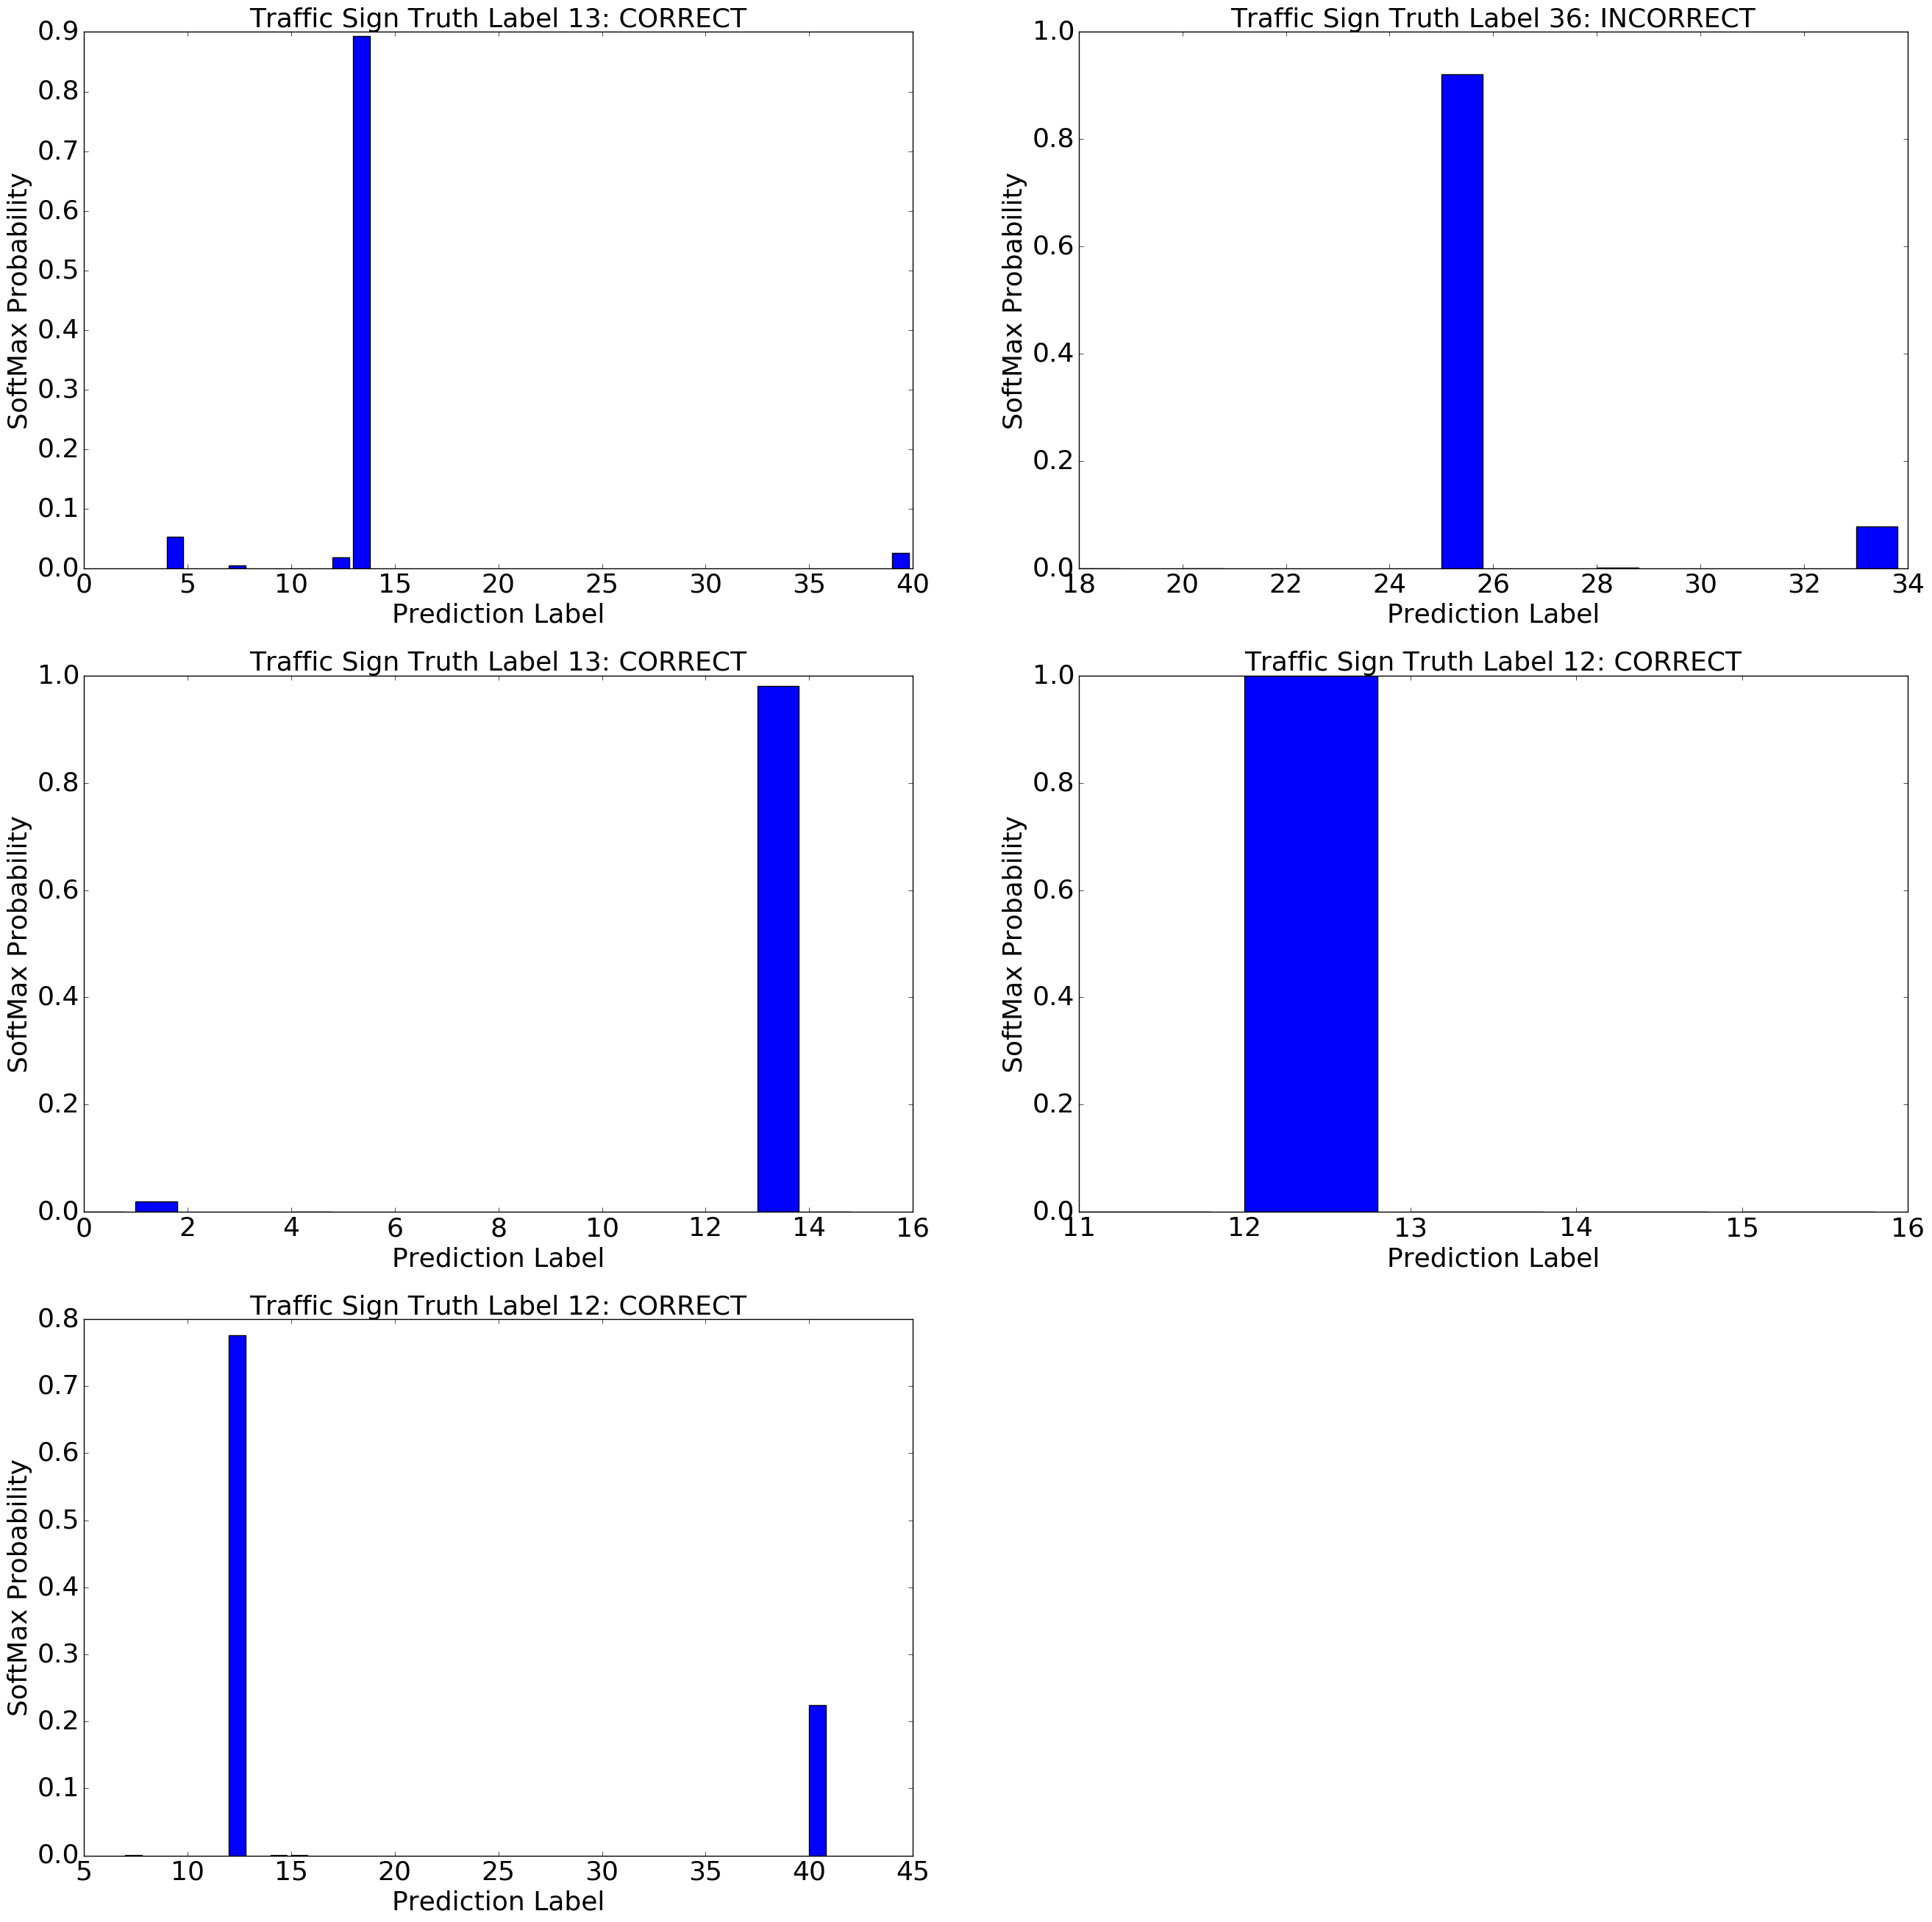

In [54]:
# Visualize the certainty of its predictions
gs8 = gridspec.GridSpec(3, 2)
gs8.update(wspace=0.01, hspace=0.02)
plt.figure(figsize=(32,32))
ax8 = plt.subplot(gs8[0])
plt.subplot(3,2,1)
plt1 = plt.bar(top5_pred_labels[0],top5_pred_sftmax[0])
plt.xlabel('Prediction Label',fontsize=26)
plt.ylabel('SoftMax Probability',fontsize=26)
plt.title('Traffic Sign Truth Label 13: CORRECT',fontsize=26)
plt.tick_params(axis='both',which='major',labelsize=26)
plt.subplot(3,2,2)
plt2 = plt.bar(top5_pred_labels[1],top5_pred_sftmax[1])
plt.xlabel('Prediction Label',fontsize=26)
plt.ylabel('SoftMax Probability',fontsize=26)
plt.title('Traffic Sign Truth Label 36: INCORRECT',fontsize=26)
plt.tick_params(axis='both',which='major',labelsize=26)
plt.subplot(3,2,3)
plt3 = plt.bar(top5_pred_labels[2],top5_pred_sftmax[2])
plt.xlabel('Prediction Label',fontsize=26)
plt.ylabel('SoftMax Probability',fontsize=26)
plt.title('Traffic Sign Truth Label 13: CORRECT',fontsize=26)
plt.tick_params(axis='both',which='major',labelsize=26)
plt.subplot(3,2,4)
plt4 = plt.bar(top5_pred_labels[3],top5_pred_sftmax[3])
plt.xlabel('Prediction Label',fontsize=26)
plt.ylabel('SoftMax Probability',fontsize=26)
plt.title('Traffic Sign Truth Label 12: CORRECT',fontsize=26)
plt.tick_params(axis='both',which='major',labelsize=26)
plt.subplot(3,2,5)
plt5 = plt.bar(top5_pred_labels[4],top5_pred_sftmax[4])
plt.xlabel('Prediction Label',fontsize=26)
plt.ylabel('SoftMax Probability',fontsize=26)
plt.title('Traffic Sign Truth Label 12: CORRECT',fontsize=26)
plt.tick_params(axis='both',which='major',labelsize=26)
plt.show()

**Answer:**

### For each image the neural network found the following certainty predictions:

Image 1 it predicted correctly as ClassId 13, and it was 89% certain of this with its next 2 predictions being 5%, 2% and 1.8% respectively.

Image 2 it predicted incorrectly as ClassId 25, and it was 92% certain of this with its next 2 predictions being 7.8% for ClassId 33, the correct ClassId 36 does not appear in the top 5.

Image 3 it predicted correctly as ClassId 13, and it was 98% certain of this with its next prediction being 1.9%.

Image 4 it predicted correctly as ClassId 12, and it was 99% certain of this.

Image 5 it predicted correctly as ClassId 12, and it was 78% certain of this with its next prediction being 22%.

The model is most certain of images 3 and 4 with at softmax probabilities of 98%. It was less certain of images 1 and 5 with 78 and 89% probabilities.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.